In [1]:
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

In [2]:
# Function to get metadata for a specific indicator
def get_indicator_metadata(varcd, lang="EN"):
    base_url = "https://www.ine.pt"
    endpoint = f"{base_url}/ine/json_indicador/pindicaMeta.jsp"
    params = {
        "varcd": varcd,
        "lang": lang
    }
    
    response = requests.get(endpoint, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

# Function to fetch data from the INE API with variable dimensions
def fetch_data(varcd, dims=None, lang="EN"):
    base_url = "https://www.ine.pt/ine/json_indicador/pindica.jsp"
    params = {
        "op": 2,
        "varcd": varcd,
        "lang": lang
    }
    if dims:
        for i, dim in enumerate(dims, start=1):
            params[f"Dim{i}"] = dim
    
    response = requests.get(base_url, params=params)
    data = response.json()[0]
    return data

In [3]:
varcd = "0011369"   # Valor mediano das vendas por m2 de alojamentos familiares nos últimos 12 meses - 
# more indicators at http://smi.ine.pt/Indicador
dims  = ['S5A20234', 'S5A20233', 'S5A20232', 'S5A20231', 'S5A20224', 'S5A20223', 'S5A20222', 'S5A20221', 'S5A20214', 'S5A20213', 'S5A20212', 'S5A20211'] # Quarters

dataset =  {'city': [],
            'quarter': [],
            'square_price': []}

for dim in tqdm(dims):
    data = fetch_data(varcd, dims=[dim])
    quarter = list(data['Dados'].keys())[0] # get the quarter name
    for datapoint in data['Dados'][quarter]: # loop over all cities
        dataset['quarter'].append(quarter)
        dataset['city'].append(datapoint['geodsg'])
        dataset['square_price'].append(datapoint.get('valor', None))

100%|██████████| 12/12 [00:21<00:00,  1.81s/it]


In [4]:
df = pd.DataFrame(dataset)

In [5]:
df[df.city=='Porto']

,city,quarter,square_price
83,Porto,4th Quarter 2023,2833
178,Porto,3rd Quarter 2023,3104
271,Porto,2nd Quarter 2023,2857
363,Porto,1st Quarter 2023,2652
461,Porto,4th Quarter 2022,2640
554,Porto,3rd Quarter 2022,2603
649,Porto,2nd Quarter 2022,2519
743,Porto,1st Quarter 2022,2495
836,Porto,4th Quarter 2021,2341
931,Porto,3rd Quarter 2021,2324


In [6]:
def plot_price_evolution(df, city):
    city_data = df[df.city == city]
    city_data.square_price = city_data.square_price.astype(float)

    title  = r'Preço de venda por $m^{2}$ em ' + city
    xlabel = 'Quarter'
    ylabel = 'Preço (em €)'

    fig, ax1 = plt.subplots(figsize=(5, 5))

    ax1.bar(np.flip(city_data['quarter']), np.flip(city_data['square_price']), color='lightblue', label='Preço por $m^{2}$', zorder=2)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_title(title)

    ax1.plot(np.flip(city_data['quarter']), np.flip(city_data['square_price']), color='darkblue', marker='o', linestyle='-', label='Evolução do Preço')

    ax1.set_xticklabels(np.flip(city_data['quarter']), rotation=45, ha='right')

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    ax1.yaxis.grid(True, ls='--')

    plt.tight_layout()
    plt.show()

C:\Users\62000758\AppData\Local\Temp\ipykernel_4764\425531875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data.square_price = city_data.square_price.astype(float)
C:\Users\62000758\AppData\Local\Temp\ipykernel_4764\425531875.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(np.flip(city_data['quarter']), rotation=45, ha='right')


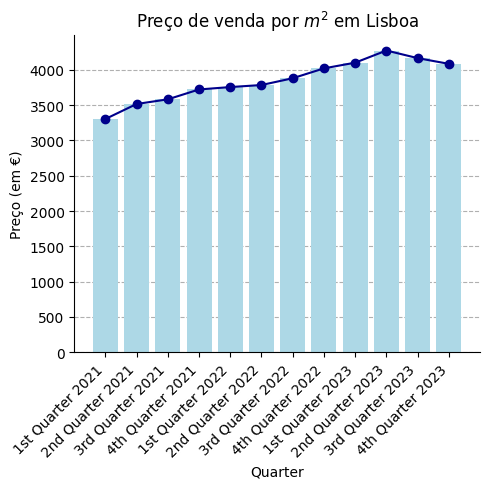

In [7]:
plot_price_evolution(df, 'Lisboa')